In [115]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

%matplotlib inline     
sns.set(color_codes=True)

In [116]:
df = pd.read_csv("../CSV/diabetes_data.csv")
df.head(5)

,gender,age,hypertension,diabetes_pedigree_function,diet_type,star_sign,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
0,female,NaN,NaN,0.37,paleo,NaN,NaN,197.7,NaN,Occasionally,Sedentary,1.5,Low,NaN,light,1.0
1,male,59.0,0.0,0.73,NaN,Leo,17.1,156.5,0.0,Occasionally,Lightly Active,5.4,Moderate,0.0,none,1.0
2,female,31.0,NaN,NaN,NaN,NaN,22.5,137.8,NaN,Occasionally,Lightly Active,7.6,Low,0.0,light,1.0
3,female,81.0,1.0,0.37,pescatarian,NaN,NaN,108.2,0.0,NaN,Sedentary,7.7,Low,1.0,heavy,NaN
4,NaN,64.0,0.0,0.55,carnivore,NaN,NaN,179.7,NaN,Occasionally,Sedentary,7.8,NaN,0.0,heavy,1.0


In [117]:
#Convert scaled strings/gender to correlating integers (operating under the assumption, this is the scale which was presented to the participants)
df['social_media_usage'] = df['social_media_usage'].replace({'Never':0,'Occasionally':1, 'Moderate':2, 'Excessive':3})
df['physical_activity_level'] = df['physical_activity_level'].replace({'Sedentary':0, 'Lightly Active':1, 'Moderately Active':2, 'Very Active':3, 'Extremely Active':4})
df['stress_level'] = df['stress_level'].replace({'Low':1, 'Moderate':2, 'Elevated':3, 'Extreme':4})
df['alcohol_consumption'] = df['alcohol_consumption'].replace({'none':0,  'light':1,  'moderate':2, 'heavy':3})
df['gender'] = df['gender'].replace({'male':0, 'female':1})
df

C:\Users\lewis.parnham\AppData\Local\Temp\ipykernel_41428\411383994.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['social_media_usage'] = df['social_media_usage'].replace({'Never':0,'Occasionally':1, 'Moderate':2, 'Excessive':3})
C:\Users\lewis.parnham\AppData\Local\Temp\ipykernel_41428\411383994.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['physical_activity_level'] = df['physical_activity_level'].replace({'Sedentary':0, 'Lightly Active':1, 'Moderately Active':2, 'Very Active':3, 'Extremely Active':4})
C:\Users

,gender,age,hypertension,diabetes_pedigree_function,diet_type,star_sign,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
0,1.0,NaN,NaN,0.37,paleo,NaN,NaN,197.7,NaN,1.0,0.0,1.5,1.0,NaN,1.0,1.0
1,0.0,59.0,0.0,0.73,NaN,Leo,17.1,156.5,0.0,1.0,1.0,5.4,2.0,0.0,0.0,1.0
2,1.0,31.0,NaN,NaN,NaN,NaN,22.5,137.8,NaN,1.0,1.0,7.6,1.0,0.0,1.0,1.0
3,1.0,81.0,1.0,0.37,pescatarian,NaN,NaN,108.2,0.0,NaN,0.0,7.7,1.0,1.0,3.0,NaN
4,NaN,64.0,0.0,0.55,carnivore,NaN,NaN,179.7,NaN,1.0,0.0,7.8,NaN,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,24.0,NaN,0.29,vegetarian,Libra,18.9,56.0,0.0,0.0,0.0,2.6,3.0,0.0,1.0,1.0
99996,0.0,53.0,1.0,0.64,weight watchers,NaN,28.4,140.8,NaN,3.0,1.0,7.5,2.0,0.0,NaN,1.0
99997,0.0,61.0,0.0,0.34,NaN,Taurus,NaN,NaN,NaN,3.0,1.0,2.8,2.0,0.0,3.0,1.0
99998,0.0,NaN,0.0,0.71,mediterranean,Leo,28.8,123.6,0.0,3.0,0.0,0.4,2.0,0.0,0.0,1.0


In [118]:
df.dtypes

gender                        float64
age                           float64
hypertension                  float64
diabetes_pedigree_function    float64
diet_type                      object
star_sign                      object
BMI                           float64
weight                        float64
family_diabetes_history       float64
social_media_usage            float64
physical_activity_level       float64
sleep_duration                float64
stress_level                  float64
pregnancies                   float64
alcohol_consumption           float64
diabetes                      float64
dtype: object

In [119]:
remove_cols = ['diet_type','star_sign'] # removing bool columns
df = df.drop(columns=remove_cols)
int_cols = ['gender', 'hypertension', 'family_diabetes_history','social_media_usage','physical_activity_level','stress_level','pregnancies', 'alcohol_consumption']
float_df = df.drop(columns=int_cols)
for col in float_df.columns:
    df[col].fillna(df[col].mean(),inplace=True)

for col in int_cols:
    df[col].fillna(round(df[col].mean()),inplace=True)

df.isnull().sum()

C:\Users\lewis.parnham\AppData\Local\Temp\ipykernel_41428\3841319410.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
C:\Users\lewis.parnham\AppData\Local\Temp\ipykernel_41428\3841319410.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

gender                        0
age                           0
hypertension                  0
diabetes_pedigree_function    0
BMI                           0
weight                        0
family_diabetes_history       0
social_media_usage            0
physical_activity_level       0
sleep_duration                0
stress_level                  0
pregnancies                   0
alcohol_consumption           0
diabetes                      0
dtype: int64

In [120]:
# int_cols = ['gender', 'hypertension', 'family_diabetes_history','social_media_usage','physical_activity_level','stress_level','pregnancies', 'alcohol_consumption']

# for col in int_cols:
#     df[col].astype(int)

# df.dtypes

In [121]:
df.describe()

,gender,age,hypertension,diabetes_pedigree_function,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.359310,45.107306,0.162140,0.500877,26.978545,150.526618,0.241320,1.398720,0.651310,5.295149,2.601210,0.806490,1.652830,0.954936
std,0.479801,16.607022,0.368581,0.155552,5.368847,51.677242,0.427886,1.019163,0.721284,2.543079,1.019739,1.150355,1.152092,0.185825
min,0.000000,18.000000,0.000000,0.200000,1.800000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,0.000000,0.390000,24.100000,113.000000,0.000000,1.000000,0.000000,4.100000,2.000000,0.000000,1.000000,1.000000
50%,0.000000,45.107306,0.000000,0.500877,26.978545,150.526618,0.000000,1.000000,1.000000,5.295149,3.000000,0.000000,2.000000,1.000000
75%,1.000000,57.000000,0.000000,0.610000,29.900000,188.100000,0.000000,2.000000,1.000000,6.600000,3.000000,1.000000,3.000000,1.000000
max,1.000000,91.000000,1.000000,0.800000,53.100000,250.000000,1.000000,3.000000,4.000000,12.000000,4.000000,5.000000,3.000000,1.000000


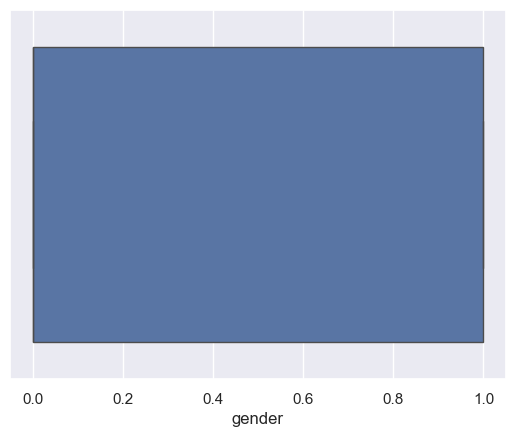

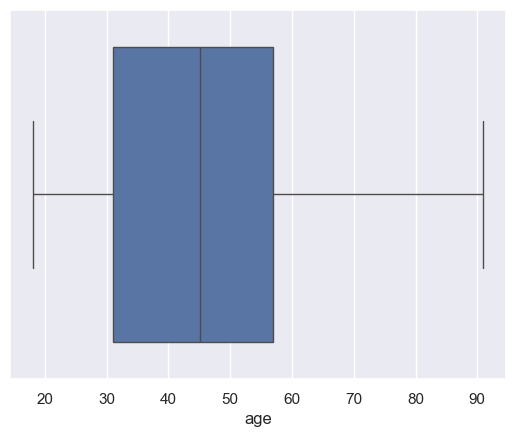

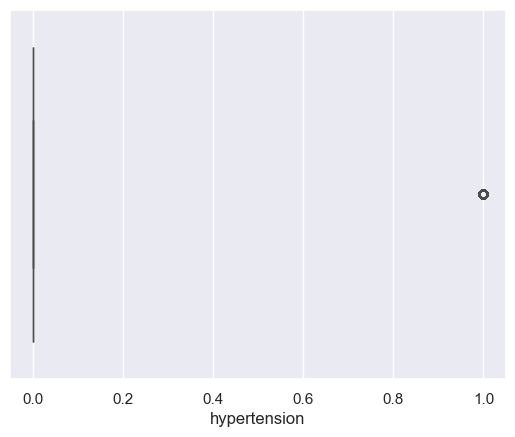

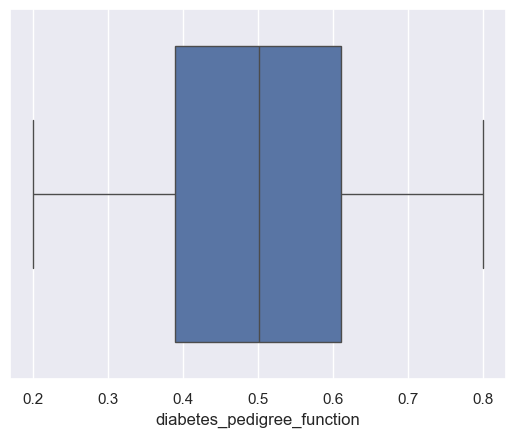

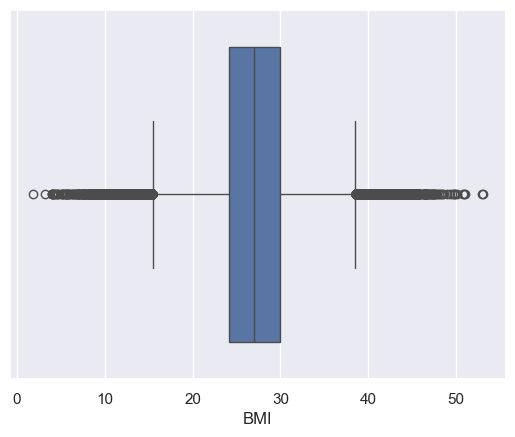

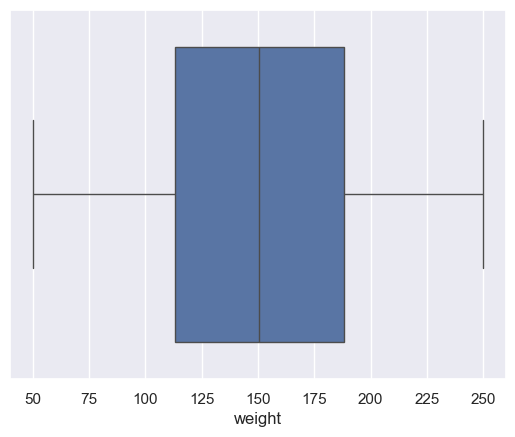

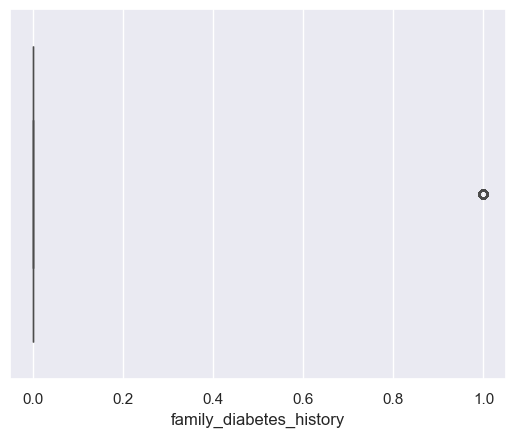

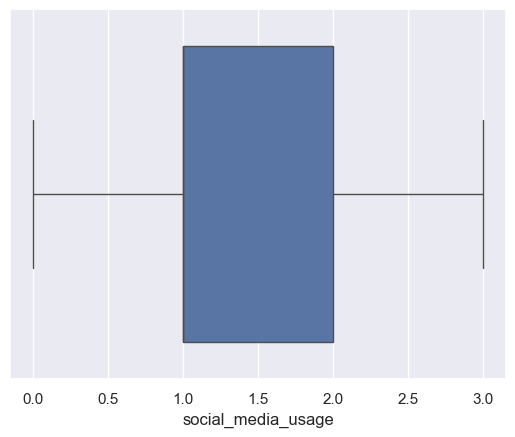

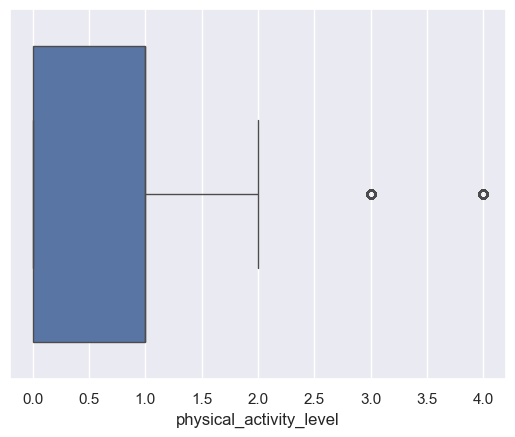

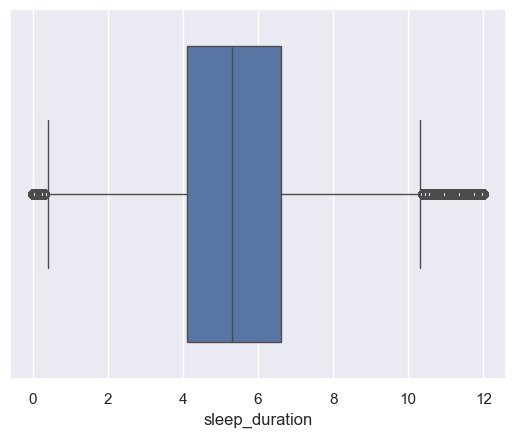

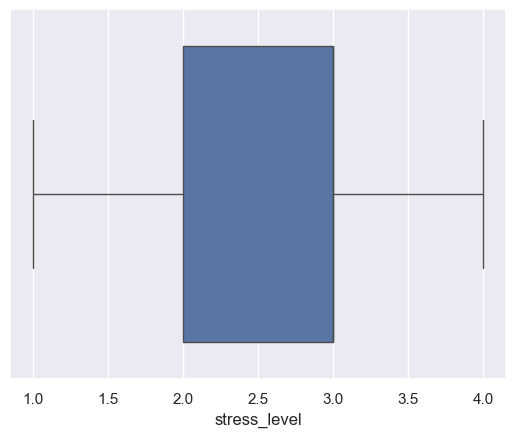

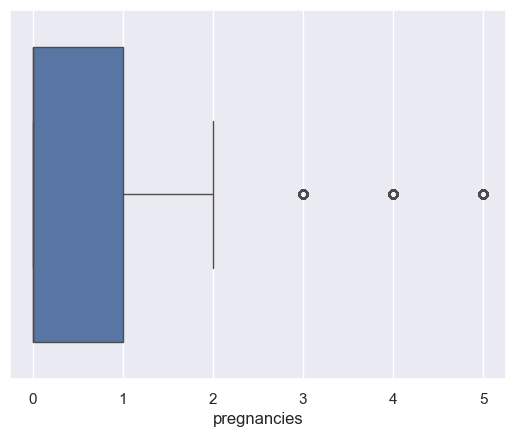

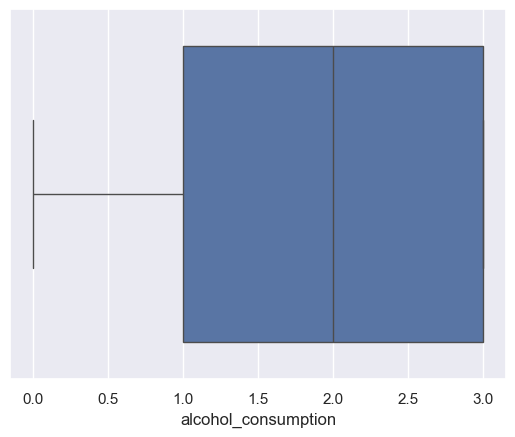

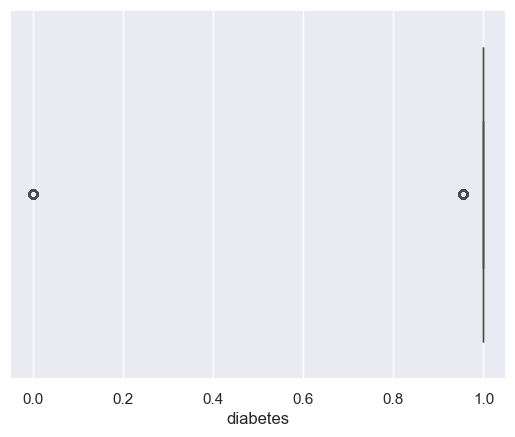

In [122]:
for col in df.columns:
    plt.figure()
    sns.boxplot(x=df[col])

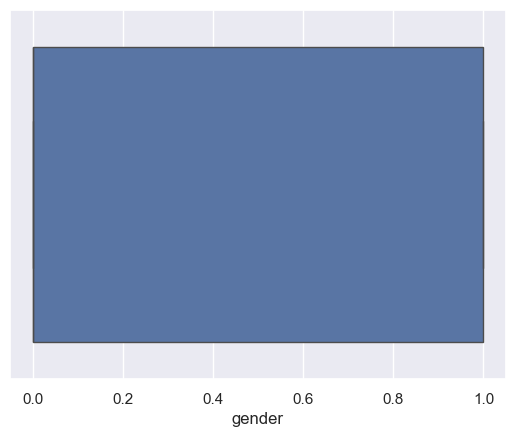

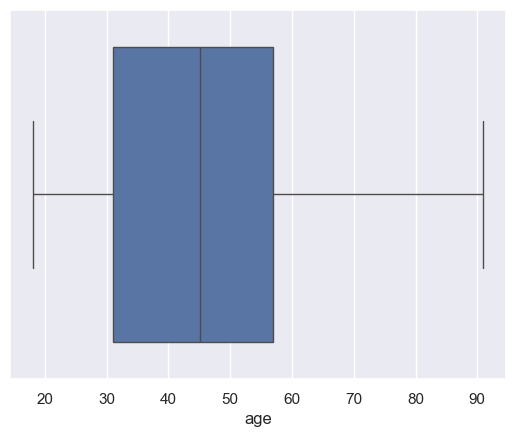

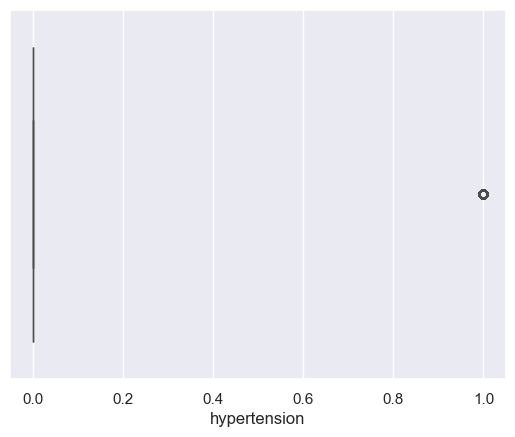

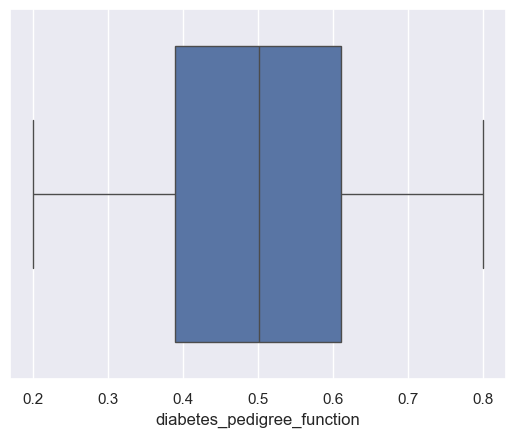

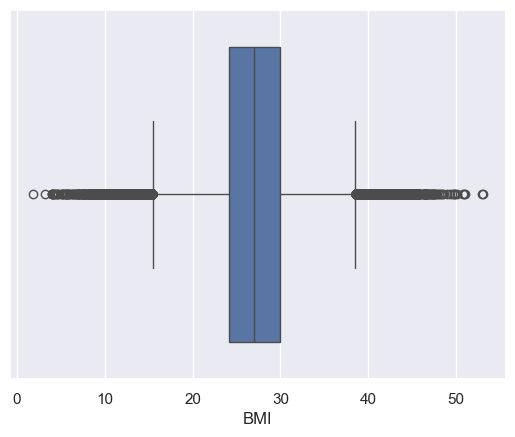

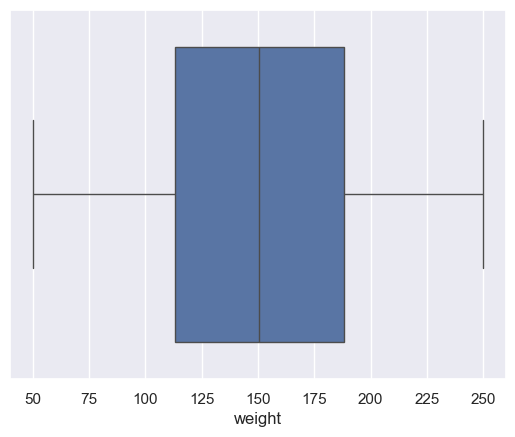

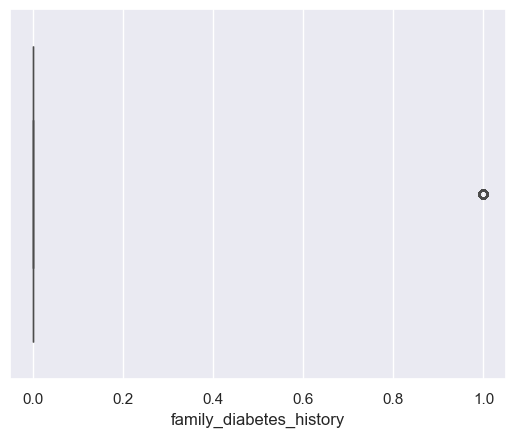

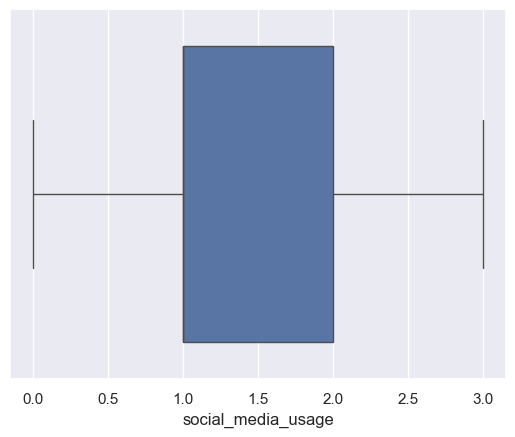

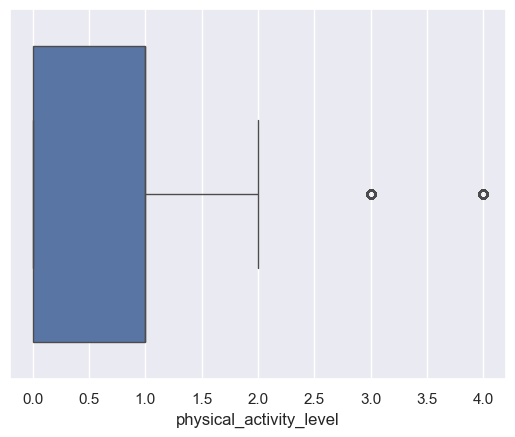

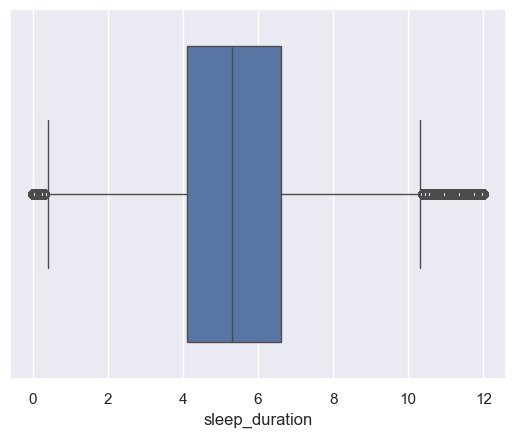

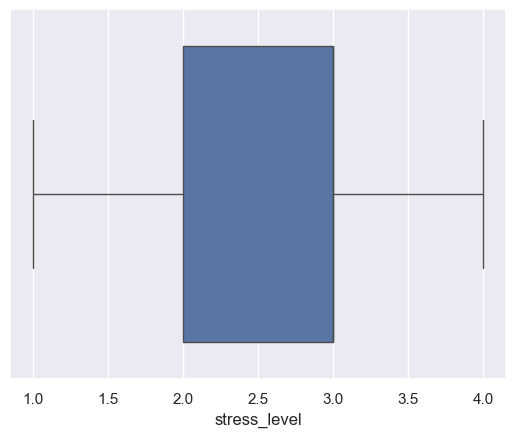

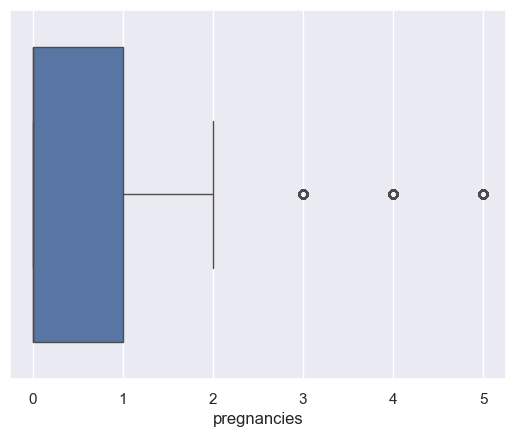

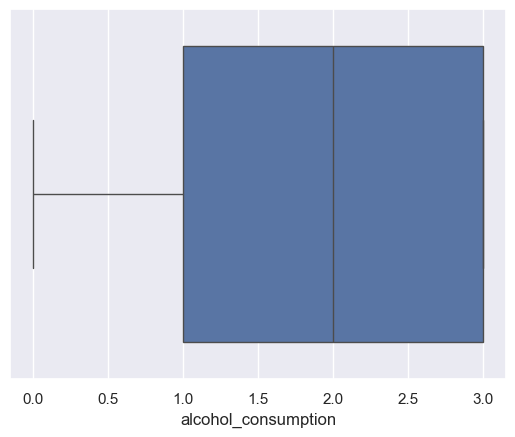

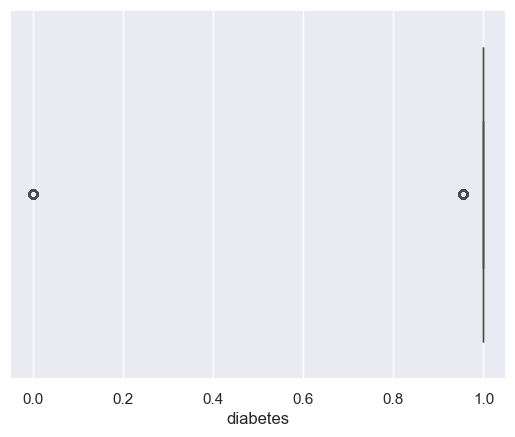

In [123]:
for col in df.columns:
    plt.figure()
    sns.boxplot(x=df[col])